# Laboratorio de regresión lineal

|                |   |
:----------------|---|
| **Nombre**     |   |
| **Fecha**      |   |
| **Expediente** |   |   |

La regresión lineal es una heramienta útil para predecir una respuesta cuantitativa. A pesar de que existen soluciones más modernas, la regresión lineal se sigue usando, pues sirve como un punto de partida para comparar otras herramientas.

Se debe comprender cómo funciona la regresión antes de empezar a estudiar métodos de aprendizaje estadístico más complejos.

1. Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [11]:
import pandas as pd

In [13]:
datos = pd.read_csv("Advertising.csv")

In [15]:
datos

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

Mientras más dinero gasten en publicidad más ventas se generan. La televisión es la publicidad que más genera, luego el periódico y por último la radio

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

La publicidad ayuda mucho a mejorar las ventas

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

## Regresión lineal simple

Un método sencillo para predecir una variable cuantitativa $Y$ dado un solo predictor $X$. Podemos escribir esta relación como:

$$ Y \approx \beta_0 + \beta_1 X$$

Por ejemplo, si decimos que $X$ se refiere a lo gastado en publicidad de TV y que $Y$ son las ventas, podemos buscar:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

A $\beta_0$ y $\beta_1$ se le conoce como los coeficientes o parámetros del modelo. Una vez que usamos los datos históricos para producir estimados $\hat{\beta_0}$ y $\hat{\beta_1}$, podemos predecir ventar futuras basándonos en lo gastado en publicidad en TV usando
$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $$

donde $\hat{y}$ indica una predicción de $Y$ basado en $X = x$. (El símbolo $\hat{ }$ se usa para hacer notar que es sólo una estimación de un parámetro desconocido)

### Estimando coeficientes

$\beta_0$ y $\beta_1$ son desconocidos. Se deben estimar usando los datos antes de poder predecir. 

$ (x_1, y_1), (x_2, y_2), ..., (x_n, y_n) $ representa $n$ observaciones, cada una con datos medidos para $X$ y $Y$.

El archivo de publicidad contiene observaciones de 200 mercados y presupuestos usados para publicidad en 3 medios. Nuestra meta actual es encontrar $\hat{\beta_0}$ y $\hat{\beta_1}$ tal que exista un modelo lineal que se ajuste bien a los datos ($y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$  para $ i=1,...,n$).

Hay muchas formas de medir el ajuste de una curva; la más común es usar el criterio de los mínimos cuadrados. Si $y_i \approx \hat{\beta_0} + \hat{\beta_1}x_i$ es una predicción de $Y$ basada en el valor número $i$ de $X$, entonces definimos el error/residuo como $e_i = y_i - \hat{y_i}$. Este residuo es la diferencia entre el valor observado y el valor estimado por nuestro modelo lineal. Definimos la suma de los residuos cuadrados (RSS) como:
$$ \text{RSS} = e_1^2 + e_2^2 + ... + e_n^2 $$

Utiliza la función `minimize` del módulo `optimize` la librería `scipy` para estimar los parámetros del modelo.

In [558]:
x = datos["TV"]
y = datos["sales"]

In [560]:
n = len(y)

In [562]:
import numpy as np
ones = np.ones([n, 1])
tv_factor = np.reshape(x, [n, 1])
X = np.hstack((ones, tv_factor))
y_vector = np.reshape(y,[n,1])
n, p = X.shape
beta = np.random.rand(p)
y_prediccion = X @ beta
def funcion_decosto(beta, x, y) :
    n, p = X.shape
    beta = np.reshape(beta, [p, 1])
    y_prediccion = x @ beta
    error = y_prediccion - y
    rss = error.T @ error
    return rss[0,0]

funcion_decosto(beta, X, y_vector)

4620664.556535934

In [564]:
import scipy.optimize as opt
sol = opt.minimize(funcion_decosto, beta, args=(X, y_vector))
sol.x

array([7.03259737, 0.04753661])

Al resolver el problema analíticamente se encuentra:

$$ \hat{\beta_1} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x} $$


Compara las estimaciones que encontraste con `minimize` con las que se encuentran con la fórmula dada arriba ($\bar{x}$ y $\bar{y}$ son las medias muestrales).

In [568]:
xm = np.mean(x)
ym= np.mean(y_vector)
B1 = (np.sum((X-xm)*(y_vector-ym)))/np.sum((x-xm)**2)
B1

0.04753664043301976

In [570]:
B0 = ym - B1*xm
B0

7.032593549127694

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión.

<Figure size 640x480 with 0 Axes>

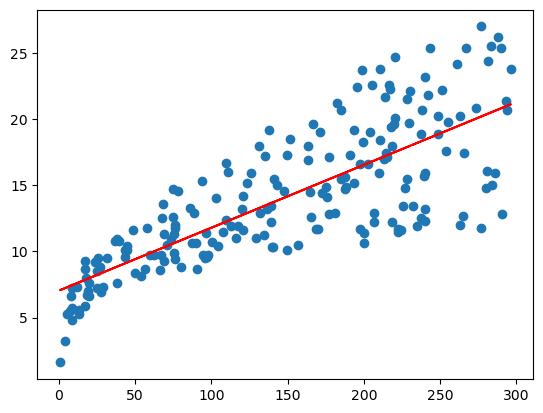

<Figure size 640x480 with 0 Axes>

In [574]:
import numpy as np
import matplotlib.pyplot as plt
yprediccion=sol.x[0]+(sol.x[1])*x
plt.scatter(x,y)
plt.plot(x, yprediccion, c = "r")
plt.figure()


### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

La población es el conjunto total de elementos a estudiar, la muestra es una porción de ese total los cuales son los que sí van a ser estudiados

¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

La población será más precisa ya que es todo el conjunto de datos, pero la muestra es más fácil de maniobrar por así decirlo y también puede conseguirse un resultado preciso a partir de la muestra

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-2}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [593]:
RSS = sol.fun
var = RSS/(n-2)
var

10.618841328951572

In [595]:
SEB0 =var*((1/n)+((xm**2)/(np.sum((x-xm)**2))))
np.sqrt(SEB0)

0.4578429402735939

In [597]:
SEB1 = var/(np.sum((x-xm)**2))
np.sqrt(SEB1)

0.002690607187797549

Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm \text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

In [601]:
#b0
ICinf = sol.x[0]-2*np.sqrt(SEB0)
ICsup = sol.x[0]+2*np.sqrt(SEB0)

ICinf,ICsup

(6.116911487695232, 7.948283248789608)

In [603]:
#b1
ICinf1 = sol.x[1]-2*np.sqrt(SEB1)
ICsup1 = sol.x[1]+2*np.sqrt(SEB1)

ICinf1, ICsup1

(0.04215539921758215, 0.05291782796877235)

Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

La hipótesis nula significa que b0 y b1 son iguales y si los restas te da 0, y la alternativa es que si son diferentes por eso no da 0

Para probal la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [615]:
mu = 0
tB0 = ((sol.x[0] - mu)/np.sqrt(SEB0))
tB0

15.360283515652638

In [617]:
tB1 = ((sol.x[1] - mu)/np.sqrt(SEB1))
tB1

17.66761562548612

La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-2))`

In [623]:
from scipy import stats

p_bj = 2*(1 - stats.t.cdf(np.abs(tB0), n-2))
p_bj1 = 2*(1 - stats.t.cdf(np.abs(tB1), n-2))
p_bj, p_bj1

(0.0, 0.0)

¿Se rechaza la hipótesis nula? ¿Qué significa?

No se rechaza porque b1 es 0, y significa que son iguales

### Verificando la precisión del modelo

Si ya tenemos unos coeficientes de regresión estimados y ya verificamos que la probabilidad de que sí hay relación entre predictor y respuesta es alta. ¿Cómo medimos qué tan bueno es nuestro modelo para predecir?
- RSE (Residual Standard Error)
- $R^2$

#### $R^2$

El RSE se mide con unidades de $Y$, así que no siempre se puede saber cuál es un buen valor. Imagina que tienes un $Y$ con valores entre $-1$ y $1$, y que tienes otro $Y$ con valores entre $1'000,000$ y $100'000,000$. Los errores cuadrados van a ser mucho mayores en el segundo caso que en el primero, pero esto no significa que el modelo creado en el segundo caso sea malo.

El estadístico $R^2$ es una medida de ajuste. Su valor es la proporción de la varianza sí explicada, así que siempre toma valores entre $0$ y $1$. Su fórmula es:

$$ R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}$$
$$ \text{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$$

TSS mide la varianza total de $Y$. RSS mide la varianza que queda sin explicarse después de la regresión. Entonces TSS-RSS mide la varianza que sí está explicada.

$R^2$ mide la proporción de la varianza en $Y$ que puede ser explicada usando $X$.

Calcula el estadístico $R^2$. ¿Cuánta varianza quedó sin explicar?

In [636]:
TSS = np.sum((y_vector - ym)**2)
TSS

5417.14875

In [638]:
R2 = 1-(RSS/TSS)
R2

0.6118750508498754

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

### Radio

In [643]:
x1 = datos["radio"]
y = datos["sales"]

In [737]:
ones1 = np.ones([n, 1])
radio_factor = np.reshape(x1, [n, 1])
X1 = np.hstack((ones1, radio_factor))
y_vector1 = np.reshape(y,[n,1])
n, p = X1.shape
beta1 = np.random.rand(p)
y_prediccion1 = X1 @ beta1
def funcion_decosto1(beta1, x1, y) :
    n, p = X1.shape
    beta1 = np.reshape(beta1, [p, 1])
    y_prediccion1 = x1 @ beta1
    error = y_prediccion1 - y
    rss1 = error.T @ error
    return rss1[0,0]

funcion_decosto(beta, X, y_vector)

4620664.556535934

In [739]:
sol1 = opt.minimize(funcion_decosto1, beta1, args=(X1, y_vector1))
sol1.x

array([9.31163856, 0.20249576])

In [741]:
xm1 = np.mean(x1)
ym1 = np.mean(y_vector1)
B1_1 = (np.sum((X1-xm1)*(y_vector1-ym1)))/np.sum((x1-xm1)**2)
B1_1

0.2024957833924398

In [743]:
B0_1 = ym1 - B1_1*xm1
B0_1

9.31163809515828

<Figure size 640x480 with 0 Axes>

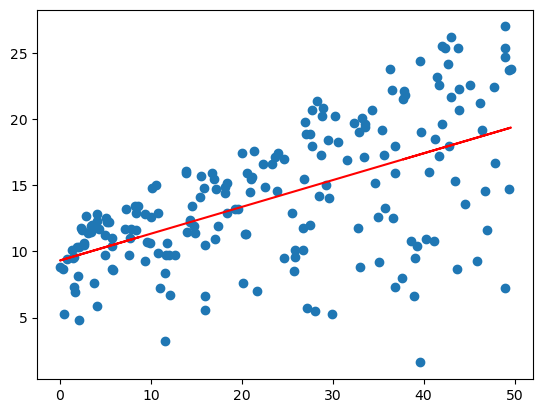

<Figure size 640x480 with 0 Axes>

In [753]:
import numpy as np
import matplotlib.pyplot as plt
yprediccion1 = sol1.x[0]+(sol1.x[1])*x1
plt.scatter(x1,y)
plt.plot(x1, yprediccion1, c = "r")
plt.figure()

In [657]:
RSS1 = sol1.fun
var1 = RSS1/(n-2)
var1

18.2751492375006

In [659]:
SEB0_1 =var1*((1/n)+((xm1**2)/(np.sum((x1-xm1)**2))))
np.sqrt(SEB0_1)

0.5629004962718736

In [661]:
SEB1_1 = var1/(np.sum((x1-xm1)**2))
np.sqrt(SEB1_1)

0.02041130636009072

In [663]:
#b0
ICinf_1 = sol1.x[0]-2*np.sqrt(SEB0_1)
ICsup_1 = sol1.x[0]+2*np.sqrt(SEB0_1)

ICinf_1,ICsup_1

(8.185837728120434, 10.437439713207928)

In [665]:
#b1
ICinf_11 = sol1.x[1]-2*np.sqrt(SEB1_1)
ICsup_11 = sol1.x[1]+2*np.sqrt(SEB0_1)

ICinf_11, ICsup_11

(0.16167314412130143, 1.32829674938523)

In [667]:
mu = 0
tB0_1 = ((sol1.x[0] - mu)/np.sqrt(SEB0_1))
tB0_1

16.54224642247745

In [669]:
tB1_1 = ((sol1.x[1] - mu)/np.sqrt(SEB1_1))
tB1_1

9.920764172028372

In [671]:
p_bj_1 = 2*(1 - stats.t.cdf(np.abs(tB0_1), n-2))
p_bj1_1 = 2*(1 - stats.t.cdf(np.abs(tB1_1), n-2))
p_bj_1, p_bj1_1

(0.0, 0.0)

### newspaper

In [710]:
x2 = datos["newspaper"]
y = datos["sales"]

In [745]:
ones2 = np.ones([n, 1])
news_factor = np.reshape(x2, [n, 1])
X2 = np.hstack((ones2, news_factor))
y_vector2 = np.reshape(y,[n,1])
n, p = X2.shape
beta = np.random.rand(p)
y_prediccion2 = X2 @ beta
def funcion_decosto2(beta, x2, y) :
    n, p = X2.shape
    beta = np.reshape(beta, [p, 1])
    y_prediccion2 = x2 @ beta
    error = y_prediccion2 - y
    rss2 = error.T @ error
    return rss2[0,0]

funcion_decosto2(beta, X2, y_vector2)

108128.63494679687

In [747]:
sol2 = opt.minimize(funcion_decosto2, beta, args=(X2, y_vector2))
sol2.x

array([12.35140724,  0.05469309])

In [749]:
xm2 = np.mean(x2)
ym2 = np.mean(y_vector2)
B1_2 = (np.sum((X2-xm2)*(y_vector2-ym2)))/np.sum((x2-xm2)**2)
B1_2

0.0546930984722734

In [751]:
B0_2 = ym2 - B1_2*xm2
B0_2

12.35140706927816

<Figure size 640x480 with 0 Axes>

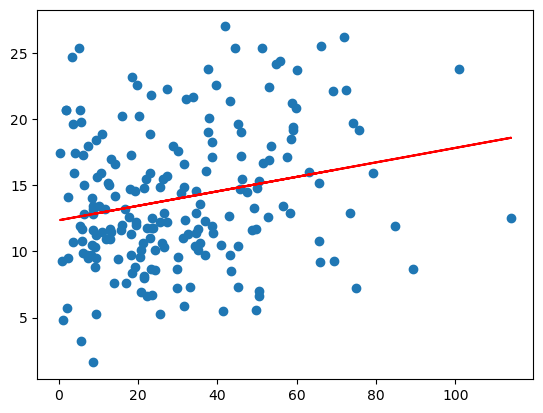

<Figure size 640x480 with 0 Axes>

In [755]:
import numpy as np
import matplotlib.pyplot as plt
yprediccion2 = sol2.x[0]+(sol2.x[1])*x2
plt.scatter(x2,y)
plt.plot(x2, yprediccion2, c = "r")
plt.figure()

In [757]:
RSS2 = sol2.fun
var2 = RSS2/(n-2)
var2

25.933356283393724

In [759]:
SEB0_2 =var2*((1/n)+((xm2**2)/(np.sum((x2-xm2)**2))))
np.sqrt(SEB0_2)

0.6214201876094356

In [761]:
SEB1_2 = var2/(np.sum((x2-xm2)**2))
np.sqrt(SEB1_2)

0.016575721876358192

In [765]:
ICinf_2 = sol2.x[0]-2*np.sqrt(SEB0_2)
ICsup_2 = sol2.x[0]+2*np.sqrt(SEB0_2)

ICinf_2, ICsup_2

(11.10856686640934, 13.594247616847085)

In [767]:
mu = 0
tB0_2 = ((sol2.x[0] - mu)/np.sqrt(SEB0_2))
tB0_2

19.876095897597565

In [769]:
tB1_2 = ((sol2.x[1] - mu)/np.sqrt(SEB1_2))
tB1_2

3.2995900601222004

In [771]:
p_bj_2 = 2*(1 - stats.t.cdf(np.abs(tB0_2), n-2))
p_bj1_2 = 2*(1 - stats.t.cdf(np.abs(tB1_2), n-2))
p_bj_2, p_bj1_2

(0.0, 0.0011481985178569687)

## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la función `minimize` para estimar los coeficientes $\beta_0$, $\beta_1$, $\beta_2$ y $\beta_3$

Calcula el RSS y RSE.

Dada tu matriz $X$ que contiene todos los factores como columnas, utiliza el siguiente código para encontrar el error estándar de tus estimaciones

`var_beta = np.linalg.inv(X.T @ X) * rse**2`

`std_beta = np.sqrt(var_beta.diagonal())`

El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.

Calcula los estadísticos t y *p-values* de tus estimaciones.

¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en regresiones simples? ¿Por qué crees que existen estas diferencias?

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3